# Optimize the vertical KB mirror at the TES beamline in Shadow3

In [1]:
%run -i ../../../examples/prepare_bluesky.py
%run -i ../../../examples/prepare_tes_shadow.py

kbs = [kbv.x_rot, kbv.offz]
kb_bounds = np.array([[-0.10, +0.10], [-0.50, +0.50]]) 

for dof in kbs:
    dof.kind = "hinted"

In [2]:
from bloptools.experiments.shadow import tes

boa = bloptools.bo.BayesianOptimizationAgent(
                                             dofs=kbs, 
                                             dets=[w9],
                                             bounds=kb_bounds, 
                                             db=db, 
                                             experiment=tes
                                            )

RE(boa.initialize(init_scheme='quasi-random', n_init=8))

learning with strategy "quasi-random" ...


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array
getshonecol: no GOOD rays, returning empty array


   kbv_x_rot  kbv_offz    fitness
0  -0.020347 -0.029372  30.106189
1  -0.095347  0.303962  28.024582
2  -0.070347 -0.251594  28.427750
3  -0.045347 -0.473816  28.384658
4   0.004653 -0.362705  30.120675
5   0.054653 -0.140483  27.983508
6   0.029653  0.081739  28.801710
7   0.079653  0.415073        NaN


('8ad62aab-597b-4736-9cde-434076aafedb',)

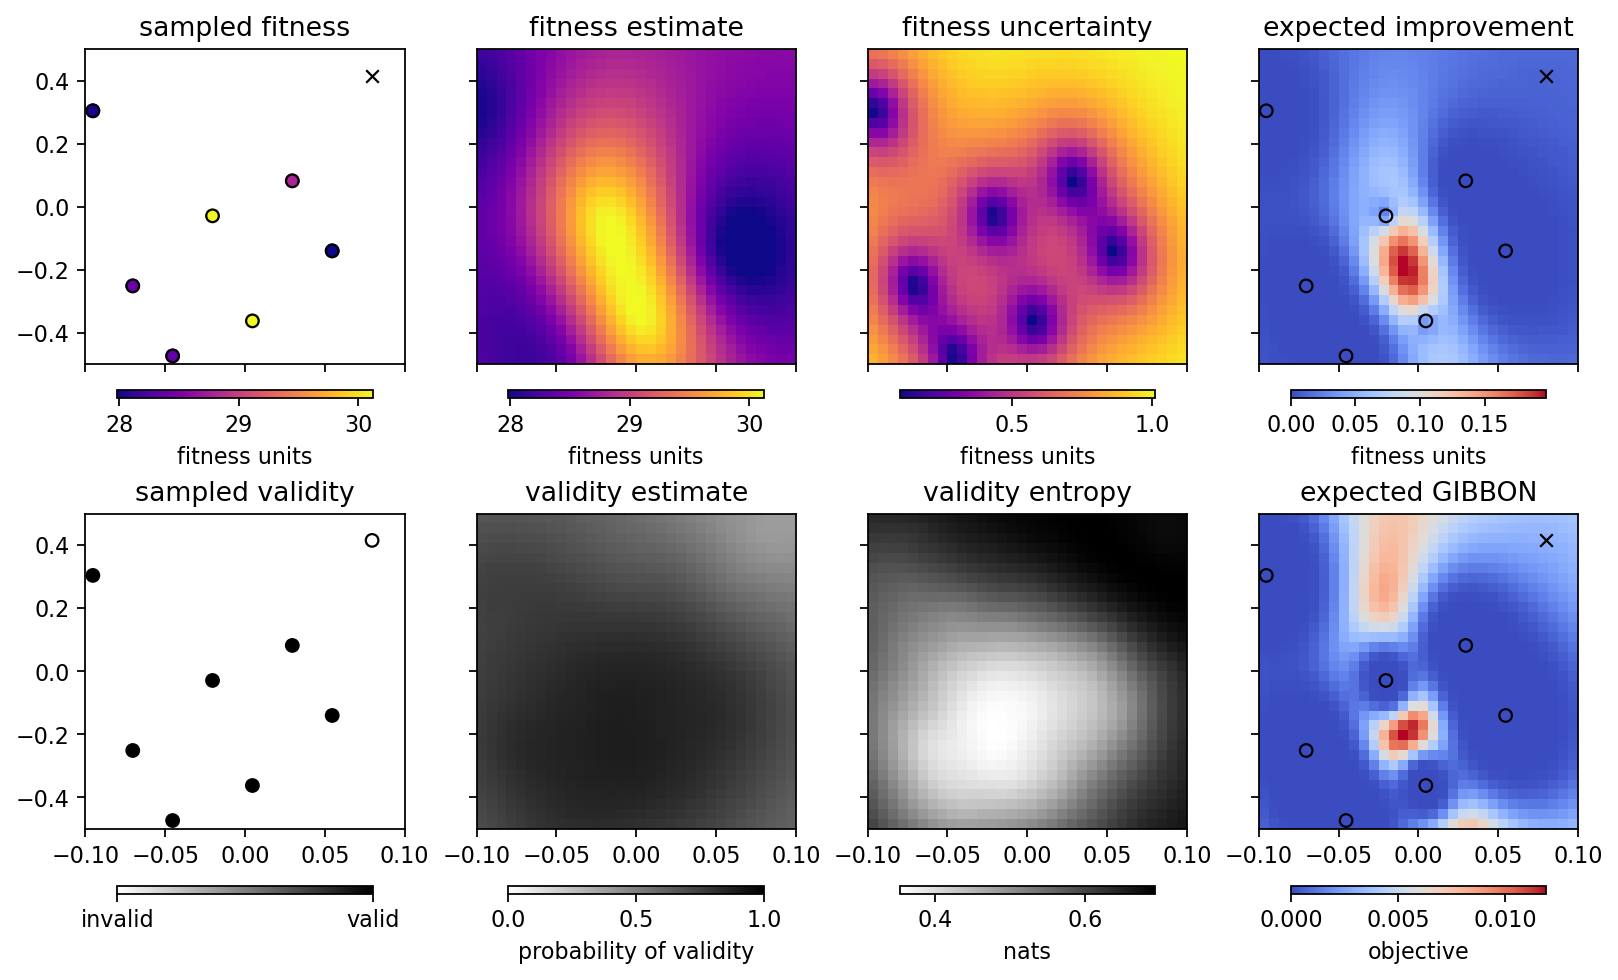

In [3]:
boa.plot_state(gridded=True)

Maximizing the expected improvement:

learning with strategy "eI" ...


    kbv_x_rot  kbv_offz    fitness
8   -0.028391  0.062016  29.719980
9   -0.008473 -0.178518  30.754108
10  -0.002323 -0.350923  30.172876
11   0.023060 -0.498462  26.261332


    kbv_x_rot  kbv_offz    fitness
12   0.004584 -0.213648  31.218354
13  -0.004158 -0.128079  30.935024
14  -0.019653 -0.197404  30.168565
15   0.005228  0.491190  16.783966


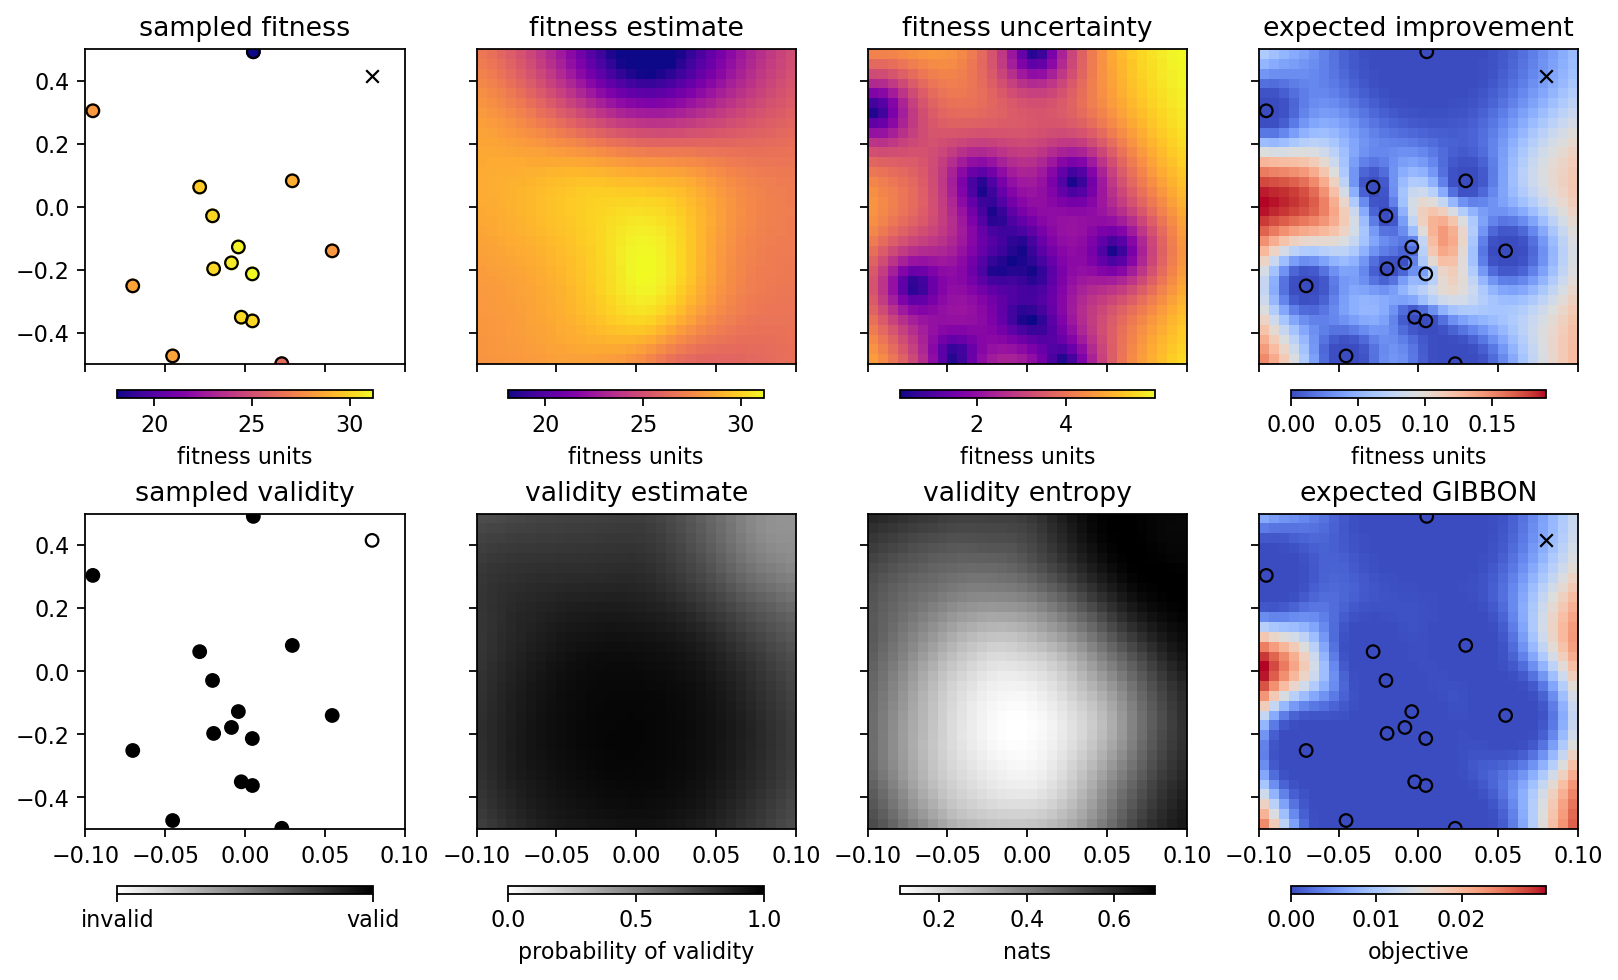

In [4]:
RE(boa.learn(strategy='eI', n_iter=2, n_per_iter=4))
boa.plot_state(gridded=True)